In [1]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
import random
import matplotlib.patheffects as PathEffects
from keras.layers import Input, Conv2D, Lambda, Dense, Flatten,MaxPooling2D, concatenate
from keras.models import Model, Sequential
from keras.regularizers import l2
from keras import backend as K
from keras.optimizers import SGD,Adam
from keras.losses import binary_crossentropy
import os
import pickle
import matplotlib.pyplot as plt
from itertools import permutations
import seaborn as sns
from keras.datasets import mnist
from sklearn.manifold import TSNE
from sklearn.svm import SVC

Using TensorFlow backend.


In [2]:
import sys
import numpy as np
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt
import cv2
import time
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model

from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform

from keras.engine.topology import Layer
from keras.regularizers import l2
from keras import backend as K

from sklearn.utils import shuffle

import numpy.random as rng

In [5]:
#I am using vgg16 architecture to extract feature vectors for now however we can use any other architecture for better results.
#Siamese Network with triplet loss trained on the dataset we want to use will surelygive better results.
vgg16_model=keras.applications.vgg16.VGG16()

In [6]:
vgg16_model1=vgg16_model
vgg16_model1.layers.pop()
vgg16_model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [7]:
model=Sequential()
for layer in vgg16_model1.layers:
    model.add(layer)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

In [8]:
from numpy import load
# load array
data = load('X.npy')   # This is simply all images in a vector

In [9]:
inputs=[]
for im in data:
    l=cv2.resize(im,(224,224))
    inputs.append(l)

In [11]:
inputs_new=[]
for im1 in inputs:
    n=im1.reshape(1,224,224,3)
    ans=model.predict(n)
    ans=ans.reshape(4096)
    inputs_new.append(ans)

In [12]:
t = np.asarray(inputs_new)

In [13]:
from numpy import asarray
from numpy import save
save('feature_vectors.npy', t )

In [ ]:
import faiss                   # make faiss available
index = faiss.IndexFlatL2(4096)   # build the index, d=size of vectors 
# here we assume t contains a n-by-d numpy matrix of type float32
index.add(t)                  # add vectors to the index
print(index.ntotal)

In [32]:
k = 100                          # we want k similar vectors
D, I = index.search(np.asarray([t[34]]), k)     # actual search
print(I)

[[  34   58   40   36   35   30 1492   46   57   39   47   48   32   55
    44   37 1477   51 1483 1491 1564 1584   53  462 1494   45   50 2264
  2061   33]]


In [16]:
from scipy.spatial import distance

In [33]:
final = []
for i in I[0]:
    dst = distance.euclidean(t[i].reshape(4096), t[34].reshape(4096))
    final.append([dst,i])

final.sort()

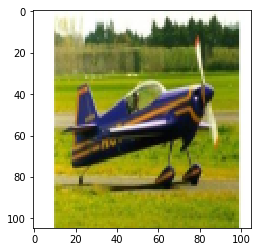

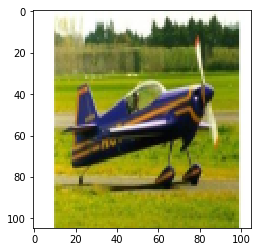

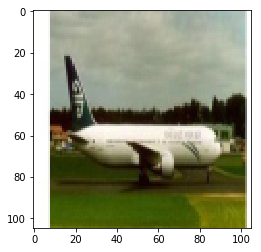

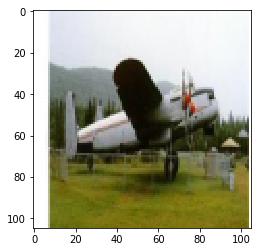

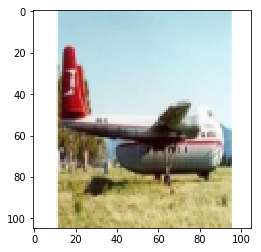

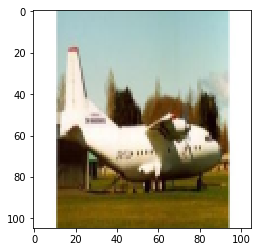

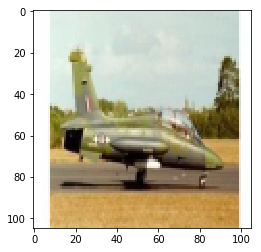

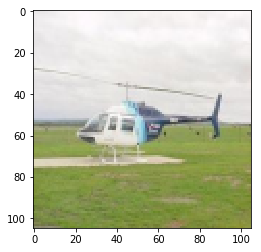

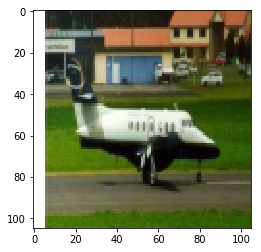

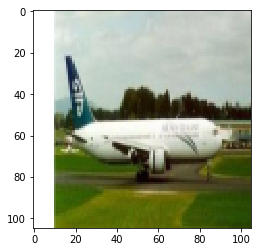

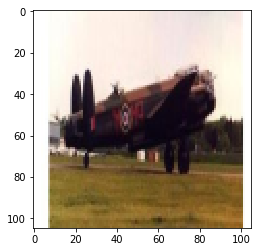

In [35]:
plt.imshow(data[34][:,:,::-1])
plt.show()
for i in final[0:3]:
    plt.imshow(data[i[1]][:,:,::-1])
    plt.show()

In [28]:
final

[[0.0, 0],
 [65.29794311523438, 21],
 [65.53728485107422, 1],
 [67.64783477783203, 10],
 [68.16815185546875, 8],
 [69.89940643310547, 11],
 [71.62627410888672, 4],
 [72.34766387939453, 28],
 [72.49057006835938, 6],
 [72.60841369628906, 17],
 [72.87162780761719, 25],
 [73.8182144165039, 2109],
 [74.02803039550781, 22],
 [75.4263687133789, 5],
 [75.4781494140625, 24],
 [75.86642456054688, 9],
 [76.86866760253906, 29],
 [77.90423583984375, 12],
 [78.94113159179688, 2112],
 [81.39189910888672, 2121],
 [81.98161315917969, 2106],
 [82.37339782714844, 3],
 [83.3593978881836, 562],
 [83.45355987548828, 1971],
 [83.61289978027344, 543],
 [83.64775848388672, 2],
 [83.88390350341797, 15],
 [83.91505432128906, 26],
 [84.24336242675781, 561],
 [84.38616943359375, 546]]

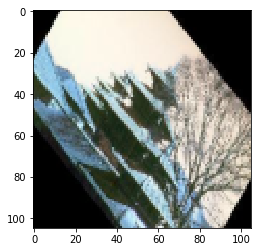

In [31]:
plt.imshow(data[2110])
plt.show()